In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, issparse # Corrected import
import seaborn as sns # For heatmap visualization of crosstab
import os
import harmony

In [9]:
adata = sc.read_h5ad("/storage/praha1/home/bucekl/labgenexp/spatial_project/sc/sce_with_CHOIR.h5ad")

print(adata) 

AnnData object with n_obs × n_vars = 54239 × 20000
    obs: 'patient.id', 'sample.id', 'Gender', 'Age', 'tissue.type', 'subsite', 'hpv', 'cell.type', 'CHOIR_clusters_0.05'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'CHOIR', 'X_name', 'hvg', 'log1p'
    obsm: 'CHOIR_P0_reduction_UMAP'
    layers: 'logcounts'


In [3]:
print(adata.obsm_keys())
print(adata.obs['CHOIR_clusters_0.05'].head())
print(adata.obs['CHOIR_clusters_0.05'].dtype)         # likely int or object
print(adata.obs['CHOIR_clusters_0.05'].unique())


['CHOIR_P0_reduction_UMAP']
AAACGGGCATGACGGA-1    3
AAAGATGAGCAGACTG-1    3
AAAGATGAGTGTACTC-1    3
AAAGATGCACTCTGTC-1    3
AAAGCAAAGACAGGCT-1    3
Name: CHOIR_clusters_0.05, dtype: int32
int32
[ 3  1  9  2  4  6  5  8 10  7 13 12 14 11 15 17 16 18]


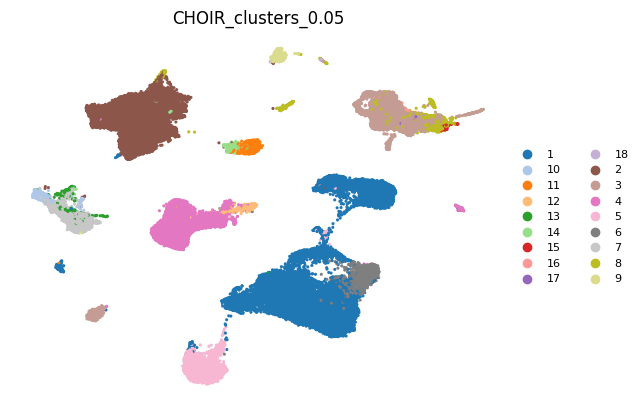

In [6]:
# pull out the DataFrame
umap_df = adata.obsm['CHOIR_P0_reduction_UMAP']

# register its raw values under 'X_umap'
adata.obsm['X_umap'] = umap_df.values   # or umap_df.to_numpy()

adata.obs['CHOIR_clusters_0.05'] = (
    adata.obs['CHOIR_clusters_0.05']
    .astype(str)
    .astype('category')
)

# pick a discrete palette of the right length
n_clusters = adata.obs['CHOIR_clusters_0.05'].nunique()
palette = sc.pl.palettes.vega_20[:n_clusters]

# plot with legend on the right, no on‐data labels
sc.pl.umap(
    adata,
    color='CHOIR_clusters_0.05',
    palette=palette,
    size=20,
    legend_loc='right margin',    # put legend outside the plot
    legend_fontsize=8,            # shrink font if you have lots of clusters
    legend_fontoutline=1,         # outline so text stays readable
    frameon=False,
    wspace=0.4
)


InvalidIndexError: (slice(None, None, None), (0, 1))

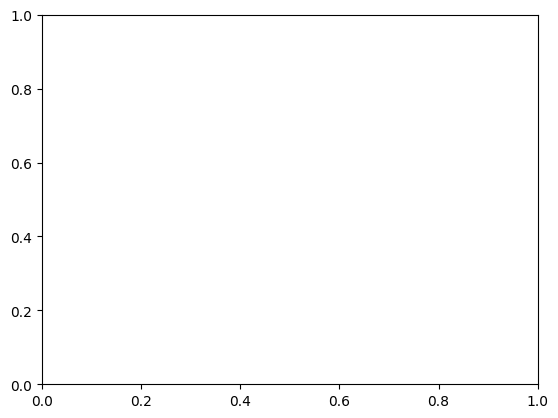

In [8]:
sc.pl.embedding(
    adata,
    basis='CHOIR_P0_reduction_UMAP',
    color='CHOIR_clusters_0.05',
    wspace=0.4
)
